In [7]:
import numpy as np
from coviar import load
from coviar import get_num_frames
#data = 'coviar.mp4'
data = 'origin_trans_b_2_b.avi'
get_num_frames(data)

407

(256, 340, 3)


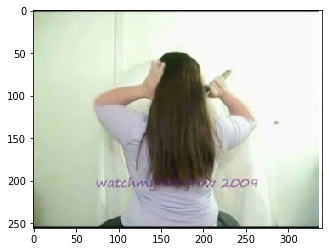

In [8]:
i = load(data, 1, 0, 0, True)
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import PIL.Image as Image
#cv2.imwrite('i1.jpg', i)
plt.imshow(i[...,::-1])
print(i.shape)

(256, 340, 2)
(256, 340, 3)


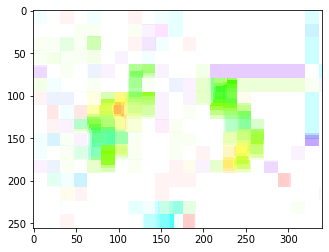

In [9]:
mv = load(data, 0, 7, 1, True)
print(mv.shape)
prvs = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
next = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
for m in range(mv.shape[0]):
    for j in range(mv.shape[1]):
        for k in range(mv.shape[2]):
            flow[m, j, k] = mv[m, j, k]

hsv = np.zeros_like(i)
hsv[...,1] = 255
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
#cv2.imwrite('m1.jpg', 255-rgb)

print(rgb.shape)
plt.imshow(255-rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 340, 3)


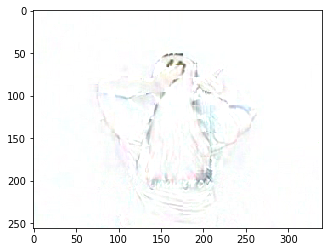

In [10]:
r = load(data, 1, 6, 2, True)
plt.imshow(255-r)
print(r.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


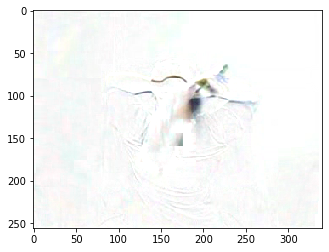

In [12]:
plt.imshow(255-mv)

In [9]:
for j in range(12):
    for i in range(10):
        for k in [False, True]:

            im = load(data, j, i, 0, k)
            %matplotlib inline
            cv2.imwrite('img/i' + str(j) + str(i) + str(k) + '.jpg', im[...,::-1])
            #plt.imshow(im[...,::-1])


In [ ]:
mv = load(data, 0, 1, 1, True)